# STEP 1: Data Collection and Data Wrangling/Data preprocessing

###  Importing required Packages for analysis

In [151]:
# Importing required packages

import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt # used for plotting
import numpy as np # for vectorisez operations
import seaborn as sns # for visualition
from matplotlib import style # used for styling our plots
from scipy.stats import skew # used for calculating skewness
from scipy.stats import norm, kurtosis # used for calculating kurtosis

### **Dataset Dictionary**


'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [181]:
# importing the dataset

df = pd.read_csv("fuel_data.csv")
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


### Viewing the summary and descriptive statistics of the dataset

In [153]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [154]:
# Descriptive Statistics

df.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2016_12_186_0_2,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


### Checking for missing values 

From the summary, we can see that the dataset has 180 data missing in the fuel_unit column

In [155]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

### Percentage of missing value in the fuel_unit Column

We can see that the feature ‘fuel_unit’ has around 60% of the data missing.

In [156]:
df['fuel_unit'].isnull().mean()*100

0.609694136774718

Since the fuel_unit column is a categorical, we can fill the missing values by the most frequent occurring entry. we can see from the descriptive summary above that the most frequent occuring entry is 'mcf' in the **fuel_unit column** which has a frequency of **11345**.

Another method of checking the most frequent entry is by using the groupby method shown below

In [157]:
# using the idxmax() to retrieve the max value
df['fuel_unit'].value_counts().idxmax()


'mcf'

In [158]:
# replacing NaN with 'mcf'

df[['fuel_unit']] = df[['fuel_unit']].fillna(value='mcf')

In [159]:
# checking if missing values are filled with mcf

df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

#                        Step 2: Exploratory Data Analysis

### Feature segregation into Numerical and Categorical

### Numerical Features

In [160]:
features_numerical = df.select_dtypes(exclude = ['object']).copy()
features_numerical.columns.tolist()

['utility_id_ferc1',
 'report_year',
 'fuel_qty_burned',
 'fuel_mmbtu_per_unit',
 'fuel_cost_per_unit_burned',
 'fuel_cost_per_unit_delivered',
 'fuel_cost_per_mmbtu']

### Categorical Features

In [161]:
features_categorical = df.select_dtypes(include=['object'])
features_categorical.columns.tolist()

['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']

## Visualization

### Univariate Distribution of Features:

Let’s see how the data in numerical features are distributed. The distplot gives us the univariate distribution plot of each variable as shown below. These plots also help us in knowing about the skewness of the features and outliers in them, if any.


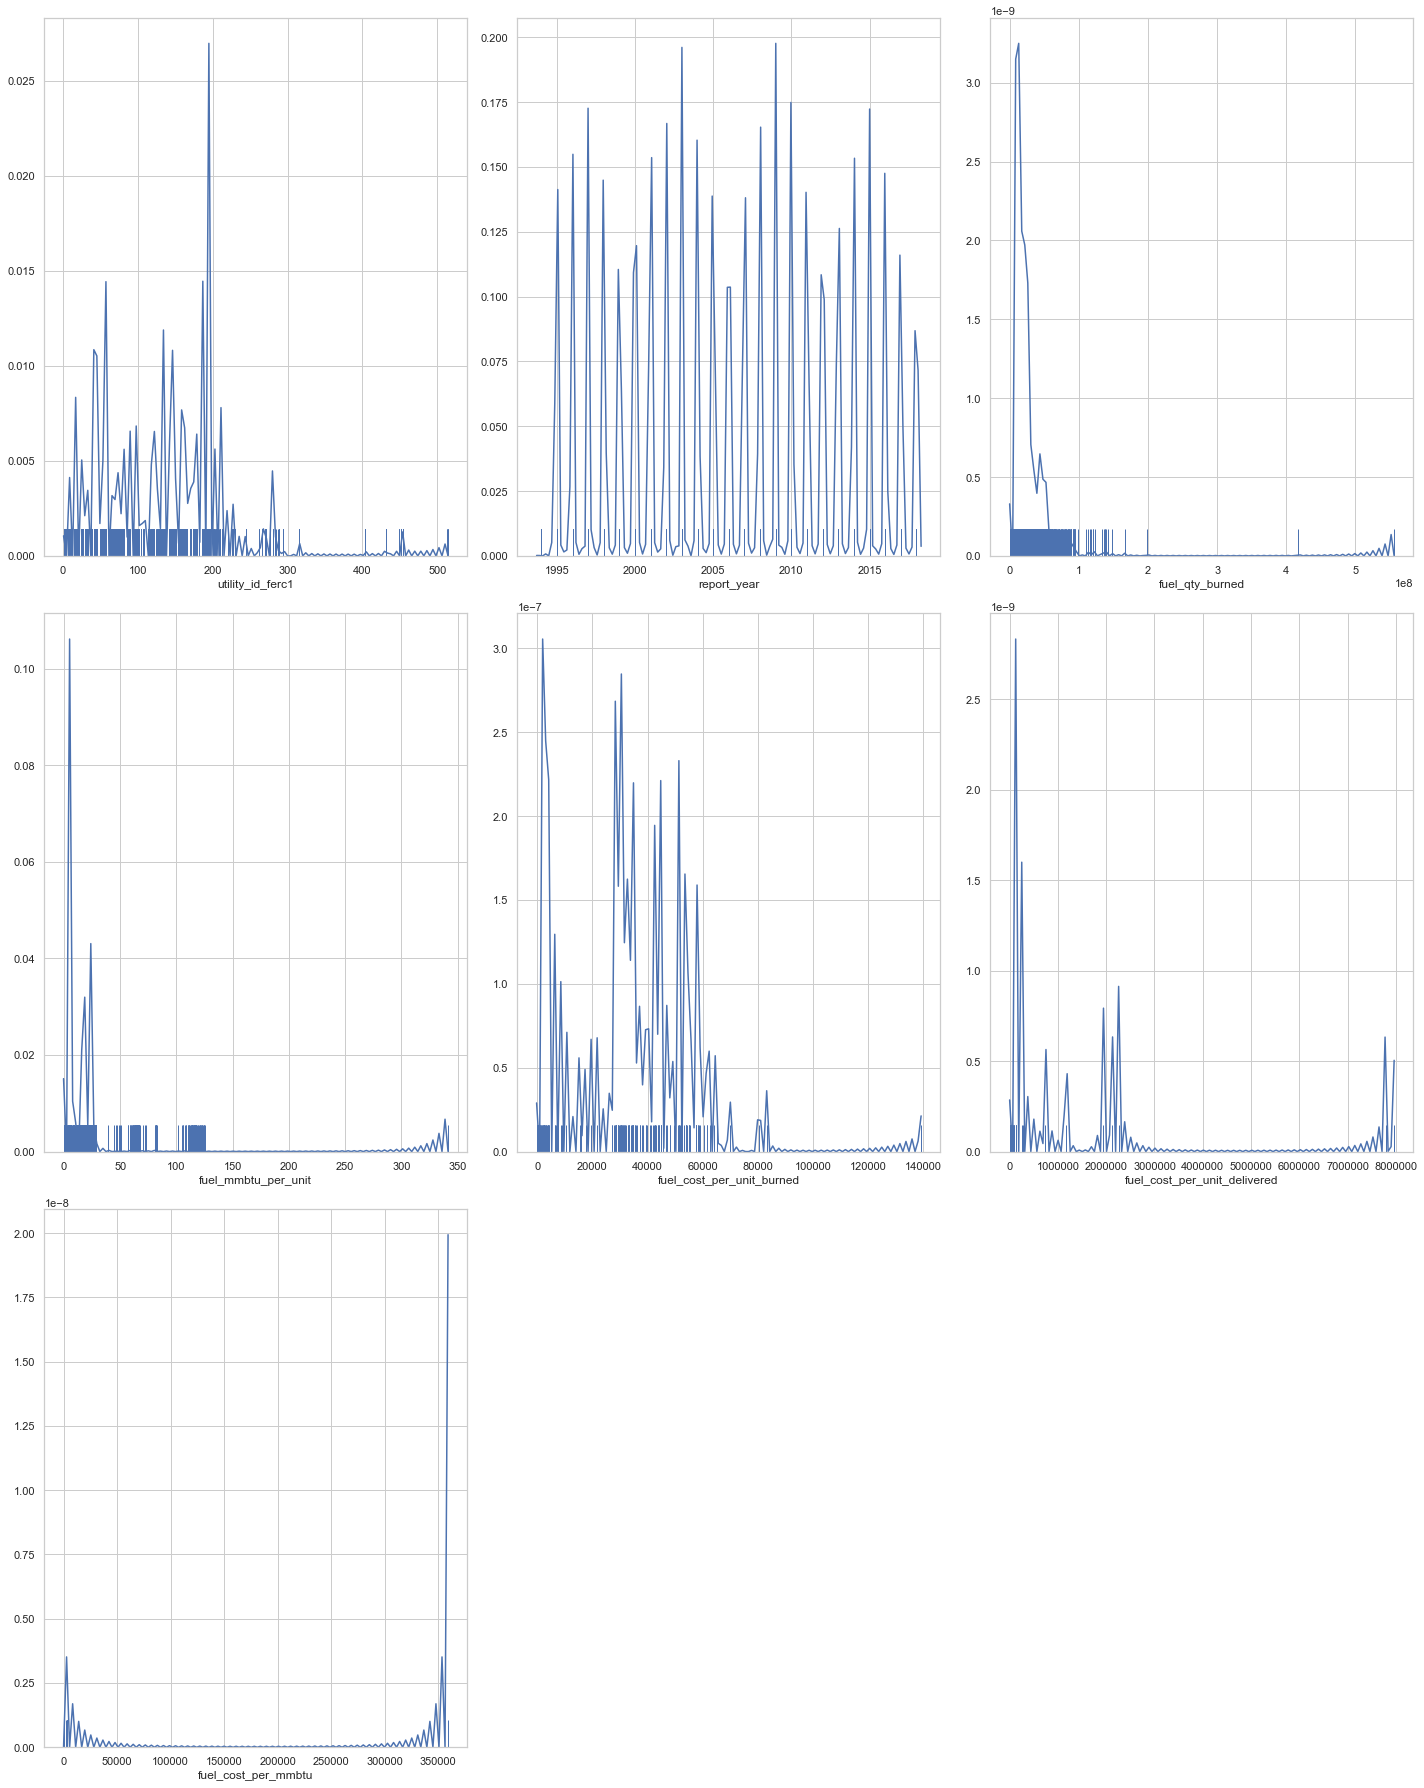

In [162]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

**We can’t decide upon the outliers on distribution plots alone. Box plots help us in knowing more about outliers in features. The dots outside the blue box depicts the data-points that pose as outliers.**

### Univariate Distribution of Features using BoxPlots

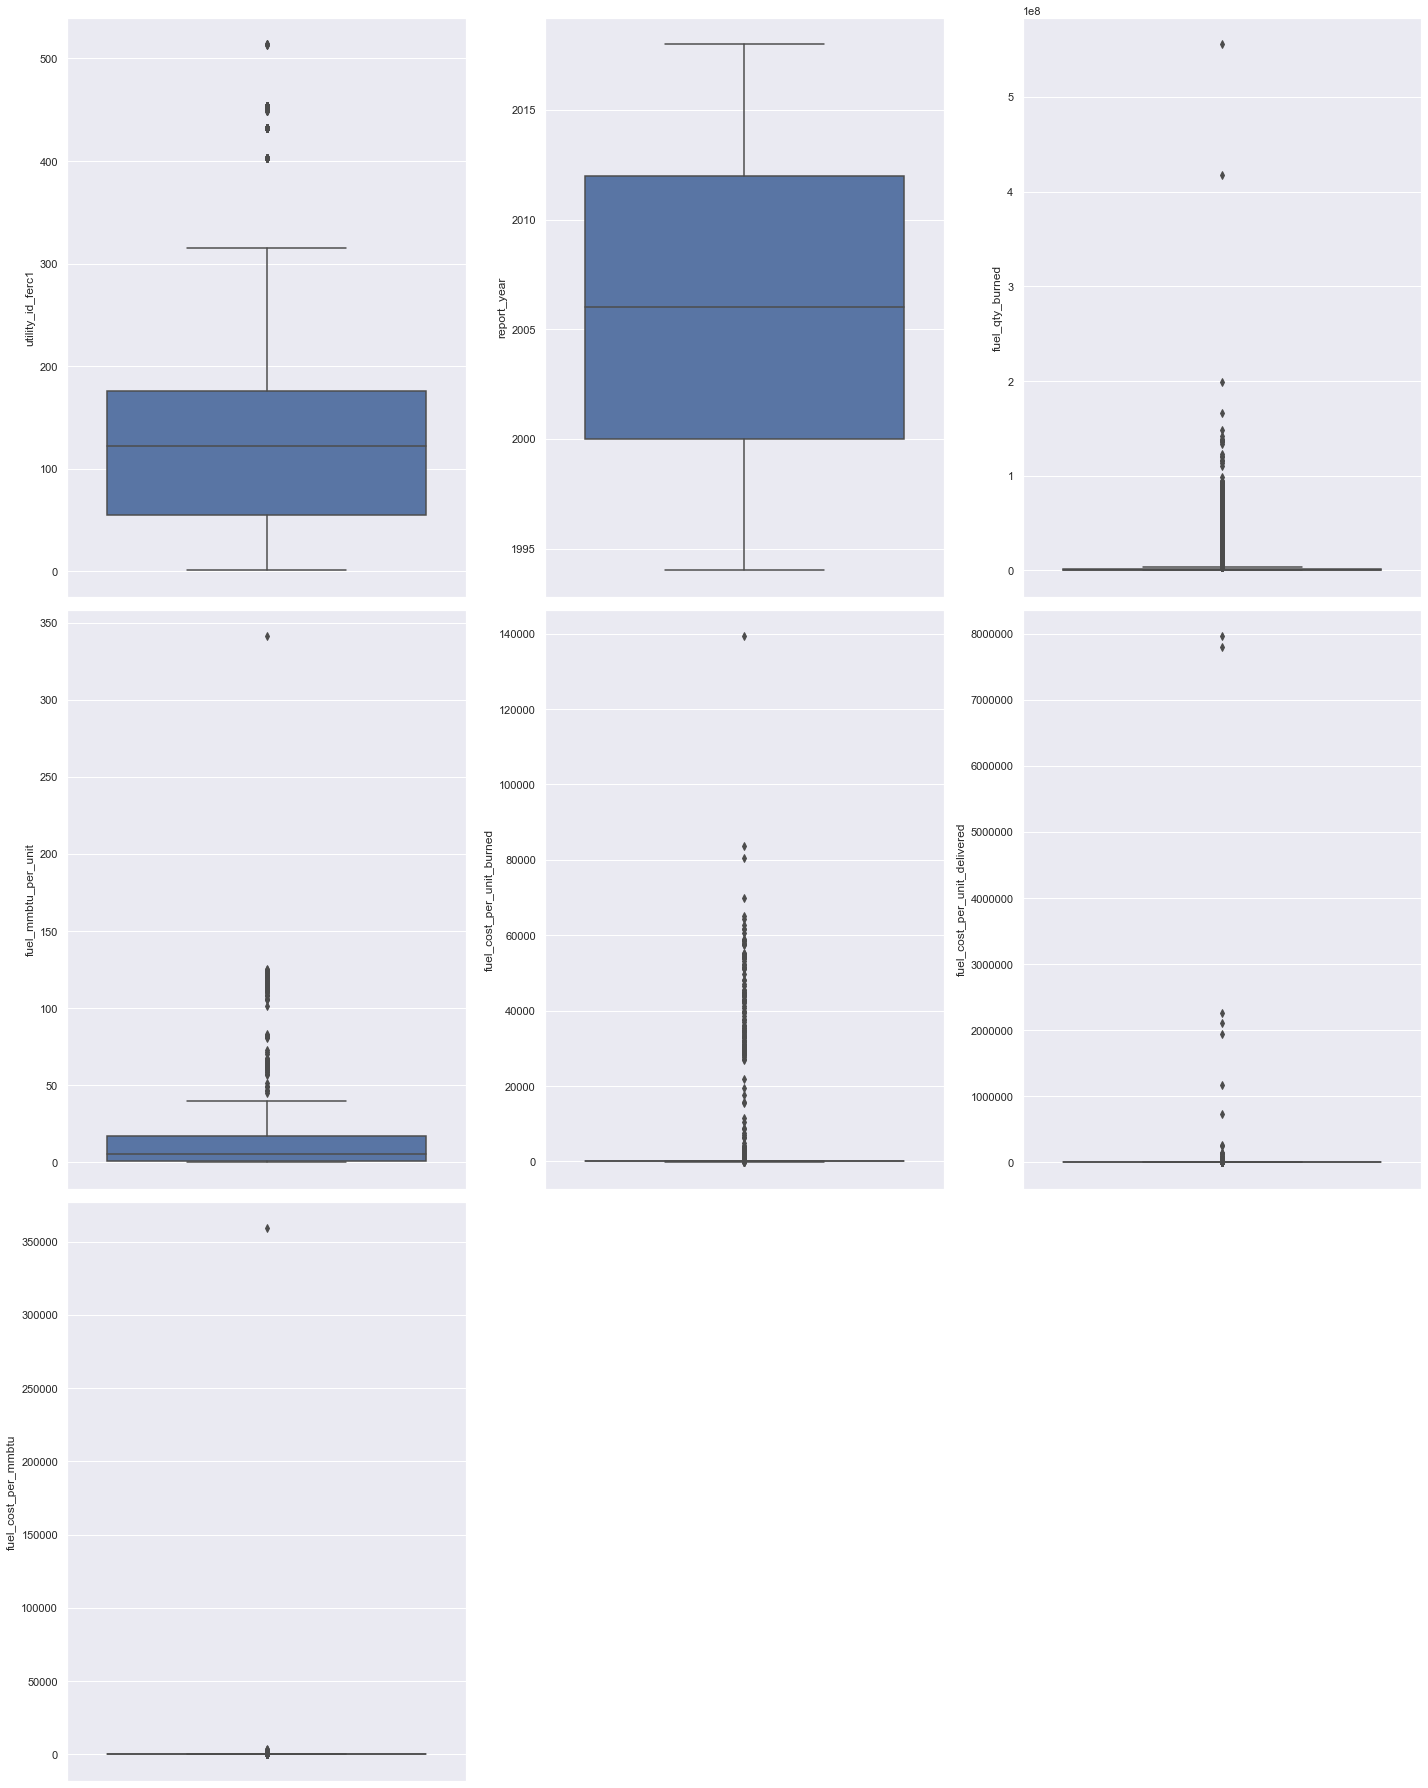

In [163]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

From the plots above, we can see that there are outliers in some features
* fuel_cost_per_unit_delivered
* fuel_mmbtu_per_unit
* Utility_id_ferc1
* fuel_qty_burned
* fuel_cost_per_unit_burned

## Checking for correlation between Numerical Features

In [164]:
# checking for correlation
corr = df.corr()


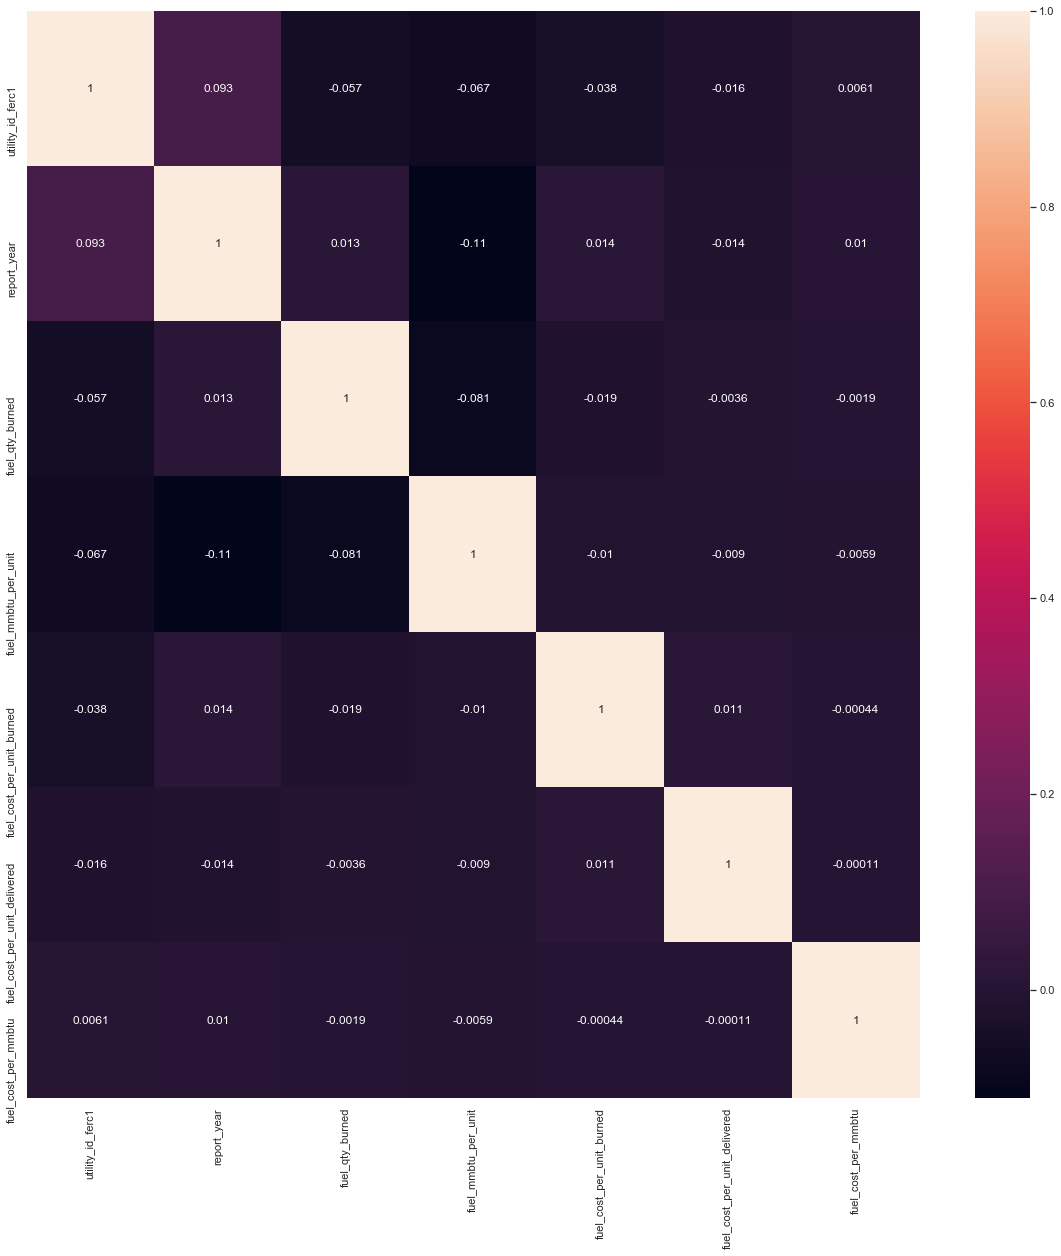

In [165]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True);

**From the above heatmap, we can see that there's no correlation betwen any pair of the numerical features**

Using the barplot to visualize the frequency of the fuel_unit feature

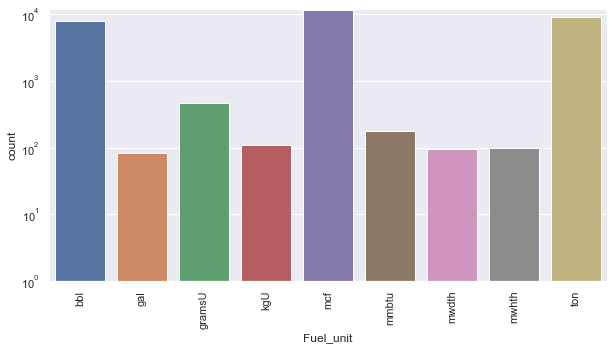

In [166]:
fuel  = pd.DataFrame({'unit': ['bbl', 'gal', 'gramsU', 'kgU', 'mcf', 'mmbtu', 'mwdth', 'mwhth','ton'],
                           'count':[7998, 84, 464, 110, 11534, 180, 95, 100, 8958]})
plt.figure(figsize=(10,5))
g = sns.barplot(fuel['unit'], fuel['count'])
g.set_yscale('log')
g.set_ylim(1, 12000)
plt.xticks(rotation=90)
plt.xlabel('Fuel_unit');

## Categorical Variables

**Here I try to answer some questions using the pandas groupby method.**

Question 1:
Which year has the highest average fuel_cost_per_unit_delivered?.

Answer: the year 1997

In [167]:
df.groupby(['fuel_cost_per_unit_delivered'])[['report_year']].mean()


,report_year
fuel_cost_per_unit_delivered,
-874.937,2008.0
-488.054,2007.0
-313.410,2004.0
-174.670,2000.0
-170.187,2015.0
...,...
1942979.000,1997.0
2114508.000,1996.0
2255688.000,1997.0


**Question 2**:
What type of fuel has the cheapest fuel_cost_per_unit_burned?

**Answer:**
Gas

In [168]:
df.groupby(['fuel_type_code_pudl'])[['fuel_cost_per_unit_burned']].mean()

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
other,18.253856
waste,19.518122


**Question 3:**
How has the fuel quantity burned evolved over the years?

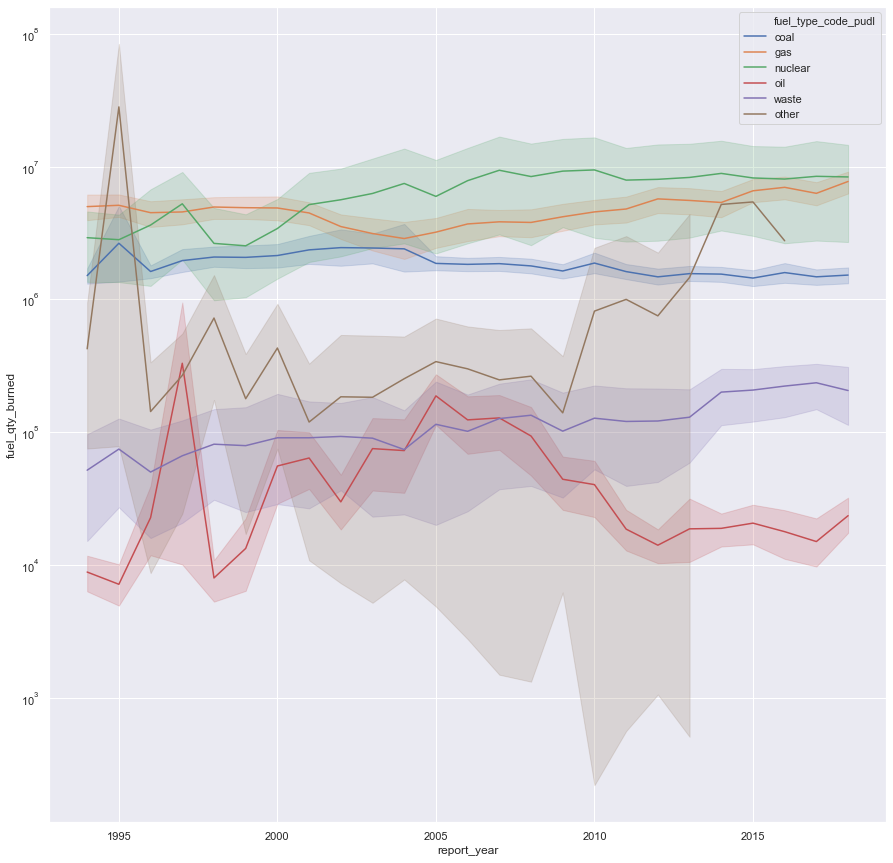

In [169]:
plt.figure(figsize=(15,15))
g = sns.lineplot(df['report_year'], df['fuel_qty_burned'], hue='fuel_type_code_pudl', data=df)
g.set_yscale('log')

We can conclude the following from the graph.

* The quantity of coal burned has stayed realtively stable over the 20 years.
* The quantity of gas burned has stayed realtively stable over the years.
* The quantity of oil burned has drastically reduced.
* The quantity of nuclear burned slighlyt increased over the years.
* The quantity of other burned is on a rise.
* The quantity of waste burned wasn't stable.

**Question:
How has the fuel cost per unit changed over the years**

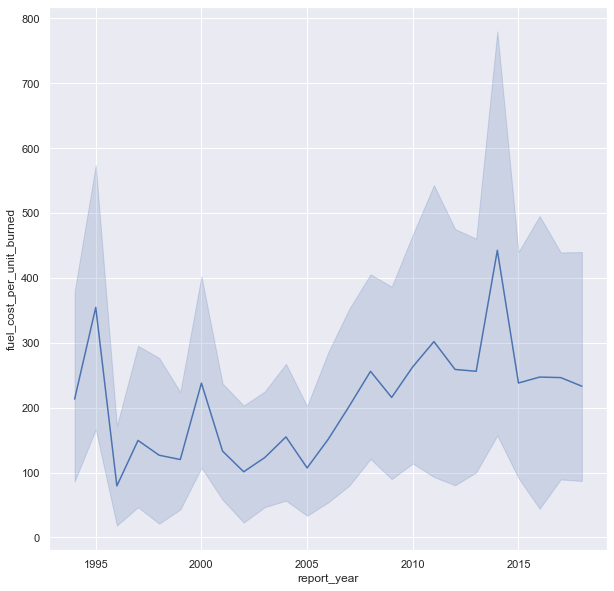

In [170]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(x=df['report_year'],y=df['fuel_cost_per_unit_burned']);

From the plot above, we can see that the price of fuel slightly increased by some percentage around 2014

**Question 4:
How has fuel cost per mmbtu changed over the years**

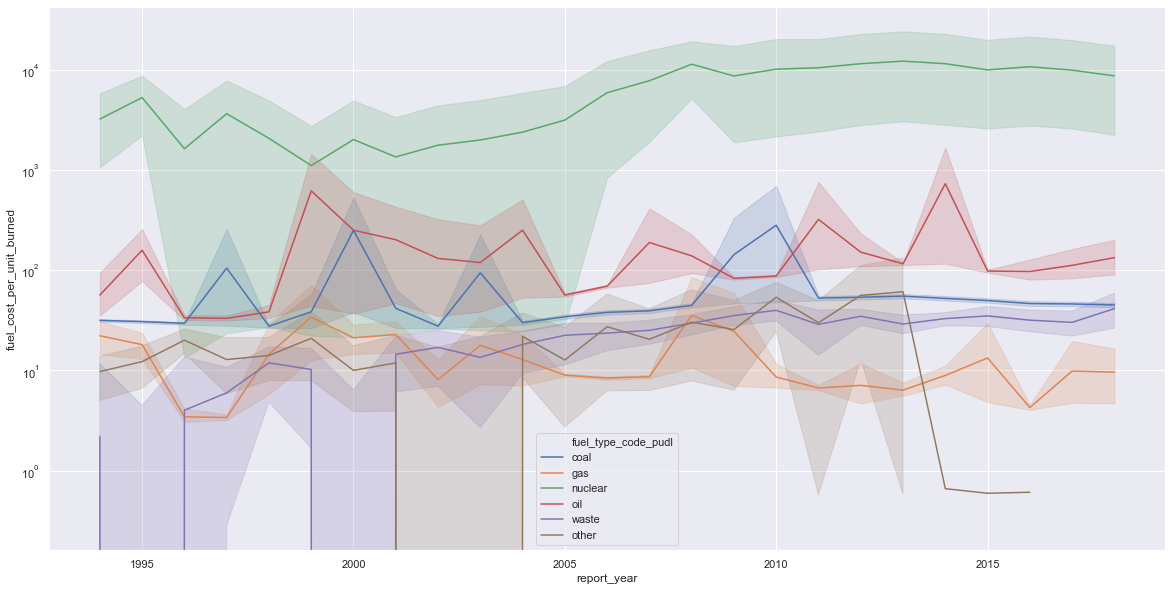

In [171]:
plt.figure(figsize=(20,10))
ax=sns.lineplot(x='report_year', y='fuel_cost_per_unit_burned',hue='fuel_type_code_pudl',data=df)
ax.set_yscale("log")

**Question 5:**
Which fuel type is mostly used?

**Answer:**
Gas

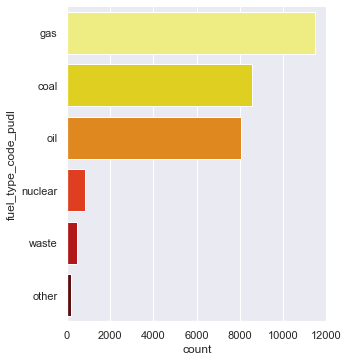

In [172]:
sns.catplot(y='fuel_type_code_pudl',
            kind="count",data=df, palette='hot_r',order=df['fuel_type_code_pudl'].value_counts().index);

### Adding New Features

I added new features to better understand the data.

In [173]:
df["total_burning_cost"]= df["fuel_cost_per_unit_burned"]*df["fuel_qty_burned"]

# total delivery cost
df["total_delivery_cost"]= df["fuel_cost_per_unit_delivered"]*df["fuel_qty_burned"]

#how much energy are the plants producing
df["total_energy_produced"] = df["fuel_mmbtu_per_unit"]*df["fuel_qty_burned"]

#how much the total energy cost
df["total_energy_cost_unit"]=df["fuel_mmbtu_per_unit"]*df["fuel_cost_per_unit_burned"]
df["total_operation_cost_per_unit"]=df["fuel_cost_per_unit_burned"]+df["fuel_cost_per_unit_delivered"]
df.head()


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_burning_cost,total_delivery_cost,total_energy_produced,total_energy_cost_unit,total_operation_cost_per_unit
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,9.964487e+07,8.921254e+07,308.40810,37.12
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,1.943231e+08,1.739994e+08,308.27936,37.11
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,1.135474e+08,7.187562e+07,958.44360,77.84
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,1.719789e+08,8.956064e+07,1130.67950,93.20
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,1.122764e+05,4.053300e+04,2.77000,5.54


## Calculating Skewness and Kurtosis in Numerical Features

In [174]:
columns = features_numerical

In [175]:
# function that computes skewness
def skewness(numerical_features):
    """"
    this function takes a list of numerical features and computes the skewness.

    """
    skewness_dict = {}
    
    for items in numerical_features.columns.tolist():
        skewness_dict[items] = round(skew(df[items]), 2)
    return skewness_dict
        

In [176]:
# computing skewness
skewness(columns)

{'utility_id_ferc1': 0.61,
 'report_year': 0.01,
 'fuel_qty_burned': 15.85,
 'fuel_mmbtu_per_unit': 4.14,
 'fuel_cost_per_unit_burned': 19.79,
 'fuel_cost_per_unit_delivered': 105.01,
 'fuel_cost_per_mmbtu': 171.67}

In [177]:
kurtosis(df['fuel_qty_burned'])

651.2589365474387

In [178]:
def Kurtosis(numerical_features):
    """"
    this function takes a list of numerical features and computes the kurtosis.

    """
    kurtosis_dict = {}
    
    for items in numerical_features.columns.tolist():
        kurtosis_dict[items] = round(kurtosis(df[items]), 2)
    return kurtosis_dict
        

In [180]:
# calculating kurtosis
Kurtosis(columns)

{'utility_id_ferc1': 1.09,
 'report_year': -1.15,
 'fuel_qty_burned': 651.26,
 'fuel_mmbtu_per_unit': 55.59,
 'fuel_cost_per_unit_burned': 485.17,
 'fuel_cost_per_unit_delivered': 11763.06,
 'fuel_cost_per_mmbtu': 29484.14}

# CONCLUSION

Having done the following exploratory data analysis on the dataset, the foolowing conclusions where drawn:
* The dataset contained outliers which can affect the machine learning algorithm during training.
* There was no  correlation between the numerical features.
* There was skewness and kurtosis in the data.
